Quimiotaxismo Bacterial
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

## Definición del problema

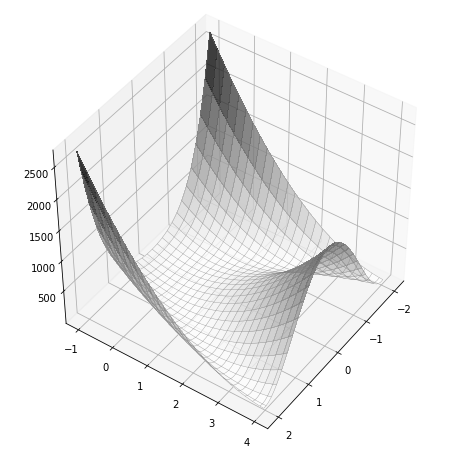

In [1]:
from plots import plot_contour, plot_surface
from testfunctions import rosenbrock as fn

#
# Se desea encontrar el punto de mínima de la función de
# Rosenbrock de dos dimensiones. El punto de mínima es
# f(1, 1) = 0. La región de busqueda es
#
#    -2.048 < x < 2.048
#       -1. < y < 4.
#
plot_surface(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
)

## Algoritmo

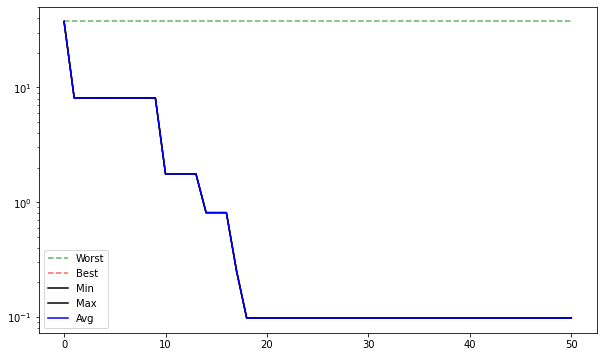

In [2]:
from bacterialchemotaxis import BacterialChemotaxis
from fnevaluator import FnEvaluator
from generators import RandomUniform
from stats import Statistics

monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
    seed=123456,
)
evaluator = FnEvaluator(fn)
stats = Statistics()

optimizer = BacterialChemotaxis(fn=fn, seed=123456)

solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 50

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

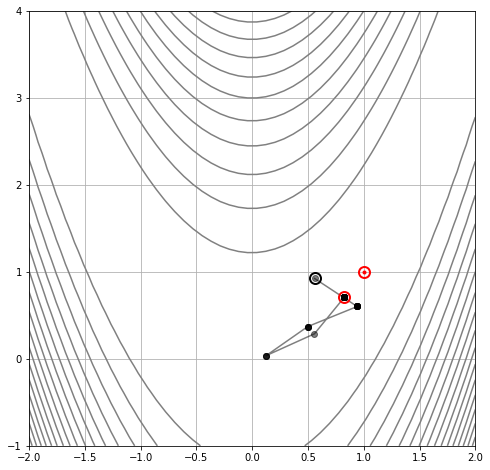

In [3]:
#
# Trayectoria del punto inicial al punto final
#
from plots import plot_trayectory

plot_trayectory(stats, fn, x_bounds=[(-2, 2), (-1, 4)], minimum=[(1, 1)])